In [1]:
!pip install torch-summary

In [2]:
from fastai.vision.all import *
from models.AE import AutoEncoder
from torchsummary import summary

In [3]:
path = untar_data(URLs.MNIST, dest='data')

In [4]:
path.ls()

(#2) [Path('data/mnist_png/training'),Path('data/mnist_png/testing')]

In [5]:
Path.BASE_PATH = path

In [6]:
img3 = get_image_files(path/'training'/'3')[0]

In [7]:
Image.open(img3)

In [8]:
data_block = DataBlock(
    blocks=(ImageBlock(cls=PILImageBW), ImageBlock(cls=PILImageBW)),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42)
)

In [9]:
data_sets = data_block.datasets(path)

In [10]:
data_sets.train[0]

(PILImageBW mode=L size=28x28, PILImageBW mode=L size=28x28)

<AxesSubplot:>

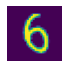

In [11]:
show_image(data_sets.train[0][0])

<AxesSubplot:>

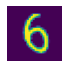

In [12]:
show_image(data_sets.train[0][1])

<AxesSubplot:>

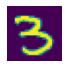

In [13]:
show_image(data_sets.train[10][0])

<AxesSubplot:>

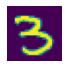

In [14]:
show_image(data_sets.train[10][1])

In [15]:
data_loaders = data_block.dataloaders(path)

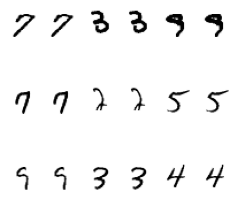

In [16]:
data_loaders.show_batch(max_n=9, figsize=(4,4))

In [17]:
model = AutoEncoder(
    input_dim=[1, 28, 28],
    conv_filters=[32, 64, 64, 64],
    conv_t_filters=[64, 64, 32, 1],
    kernel_sizes=[3, 3, 3, 3],
    strides=[1, 2, 2, 1],
    z_dim=2
)

In [18]:
summary(model, (1, 28, 28))

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 28, 28]           --
|    └─Sequential: 2-1                   [-1, 2]                   --
|    |    └─Conv2d: 3-1                  [-1, 32, 28, 28]          320
|    |    └─LeakyReLU: 3-2               [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-3                  [-1, 64, 14, 14]          18,496
|    |    └─LeakyReLU: 3-4               [-1, 64, 14, 14]          --
|    |    └─Conv2d: 3-5                  [-1, 64, 7, 7]            36,928
|    |    └─LeakyReLU: 3-6               [-1, 64, 7, 7]            --
|    |    └─Conv2d: 3-7                  [-1, 64, 7, 7]            36,928
|    |    └─LeakyReLU: 3-8               [-1, 64, 7, 7]            --
|    |    └─Flatten: 3-9                 [-1, 3136]                --
|    |    └─Linear: 3-10                 [-1, 2]                   6,274
|    └─Sequential: 2-2                   [-1, 1, 28, 28]           --

Layer (type:depth-idx)                   Output Shape              Param #
├─Sequential: 1-1                        [-1, 1, 28, 28]           --
|    └─Sequential: 2-1                   [-1, 2]                   --
|    |    └─Conv2d: 3-1                  [-1, 32, 28, 28]          320
|    |    └─LeakyReLU: 3-2               [-1, 32, 28, 28]          --
|    |    └─Conv2d: 3-3                  [-1, 64, 14, 14]          18,496
|    |    └─LeakyReLU: 3-4               [-1, 64, 14, 14]          --
|    |    └─Conv2d: 3-5                  [-1, 64, 7, 7]            36,928
|    |    └─LeakyReLU: 3-6               [-1, 64, 7, 7]            --
|    |    └─Conv2d: 3-7                  [-1, 64, 7, 7]            36,928
|    |    └─LeakyReLU: 3-8               [-1, 64, 7, 7]            --
|    |    └─Flatten: 3-9                 [-1, 3136]                --
|    |    └─Linear: 3-10                 [-1, 2]                   6,274
|    └─Sequential: 2-2                   [-1, 1, 28, 28]           --

In [19]:
learner = Learner(
    dls=data_loaders,
    model=model,
    loss_func=F.mse_loss
)

SuggestedLRs(valley=0.004365158267319202)

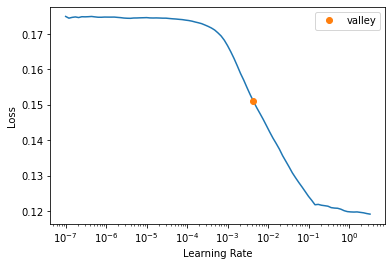

In [20]:
learner.lr_find()

In [21]:
learner.fit(3, 4e-3)

epoch,train_loss,valid_loss,time
0,0.043795,0.044319,00:31
1,0.041478,0.042058,00:25
2,0.040628,0.041118,00:25
